<a href="https://colab.research.google.com/github/naga-kj/portfolio/blob/main/Prediction_of_Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description of variables in the dataset**

**Age:** Patients Age in years (Numeric)

**Sex:** Gender (Male : 1; Female : 0) (Nominal)

**cp:** Type of chest pain experienced by patient.

This term categorized into 4 category.
           0 typical angina,
           1 atypical angina,
           2 non- anginal pain,
           3 asymptomatic (Nominal)

**trestbps:** patient's level of blood pressure at resting mode in mm/HG (Numerical)

**chol:** Serum cholesterol in mg/dl (Numeric)

**fbs:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

**restecg:** Result of electrocardiogram while at rest are represented in 3 distinct values
          0 : Normal
          
          1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

          2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

**thalach:** Maximum heart rate achieved (Numeric)

**exang:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

**oldpeak:** Exercise induced ST-depression in relative with the state of rest (Numeric)

**slope:** ST segment measured in terms of slope during peak exercise
          0: up sloping; 1: flat; 2: down sloping(Nominal)

**ca:** The number of major vessels (0–3)(nominal)

**thal:** A blood disorder called thalassemia

         0: NULL

         1: normal blood flow

         2: fixed defect (no blood flow in some part of the heart)  

         3: reversible defect (a blood flow is observed but it is not normal(nominal)

**target:** It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

**Data Collection and Processing**


*   Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')



*   Loading the data

In [ ]:
heart_df = pd.read_csv('./Heart_disease_cleveland_new.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [ ]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [ ]:
heart_df.shape

(303, 14)


*   The dataset has 303 rows/records and 14 columns/variables.



*   Summarize basic statistical data


In [ ]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Data Cleaning**

In [ ]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


*   No missing values and nulls found in the dataset





*   Renaming few column names for better readability

In [ ]:
heart_df.rename({'sex':'gender',
             'cp':'chest_pain',
             'trestbps': 'bp_rest_mode',
             'chol': 'cholesterol',
             'fbs': 'fasting_bps',
             'restecg': 'ecg_restmode',
             'thalach': 'max_hr',
             'exang': 'exer_angina'}, axis=1, inplace=True)

heart_df

,age,gender,chest_pain,bp_rest_mode,cholesterol,fasting_bps,ecg_restmode,max_hr,exer_angina,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1



*   Inspecting duplicates

In [ ]:
heart_df.duplicated().sum()

0


*   No duplicates found

**Checking the feature variables and modifying if necessary**


*   **Categorical features**


*   Gender

In [ ]:
heart_df['gender'].value_counts()

1    206
0     97
Name: gender, dtype: int64

0 ----> Female

1 ----> Male


*   Target



In [ ]:
heart_df['chest_pain'].nunique(), heart_df['ecg_restmode'].nunique(), heart_df['slope'].nunique(), heart_df['thal'].nunique()

(4, 3, 3, 3)

In [ ]:
heart_df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

0 ----> Healthy heart

1 ----> Defective heart

In [ ]:
heart_df.groupby(['gender','target']).count()

age  chest_pain  bp_rest_mode  cholesterol  fasting_bps  \
gender target                                                            
0      0        72          72            72           72           72   
       1        25          25            25           25           25   
1      0        92          92            92           92           92   
       1       114         114           114          114          114   

               ecg_restmode  max_hr  exer_angina  oldpeak  slope   ca  thal  
gender target                                                                
0      0                 72      72           72       72     72   72    72  
       1                 25      25           25       25     25   25    25  
1      0                 92      92           92       92     92   92    92  
       1                114     114          114      114    114  114   114

Female:
*   Healthy heart - 72
*   Defective     - 25

**Exploratory Data Analysis**

Visualization

*   Univariate plots




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(data_frame,col_name):
  fig, ax = plt.subplots(1,3, figsize=(11,8))
  ax1 = sns.countplot(x=col_name, data=data_frame, ax=ax[0])
  for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

  sns.boxplot(y=col_name, data=data_frame, showfliers=True, ax=ax[1])

  heart_df.groupby(col_name).size().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 12},
                                 ax=ax[2])


*   Gender

Text(0, 0.5, 'Count')

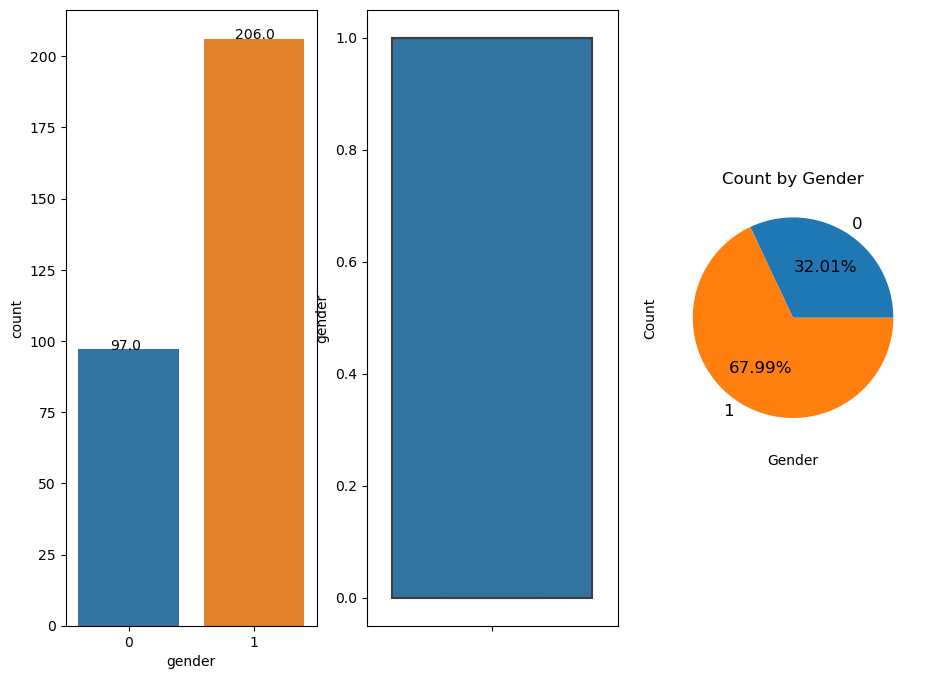

In [ ]:
visualize(heart_df,'gender')
plt.title("Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

0 ----> Female

1 ----> Male


*   Females account for 97 (32.01%) of the 303 customers, while males account for 206 (67.99%).





*   **Chest pain**


Text(0, 0.5, 'Count')

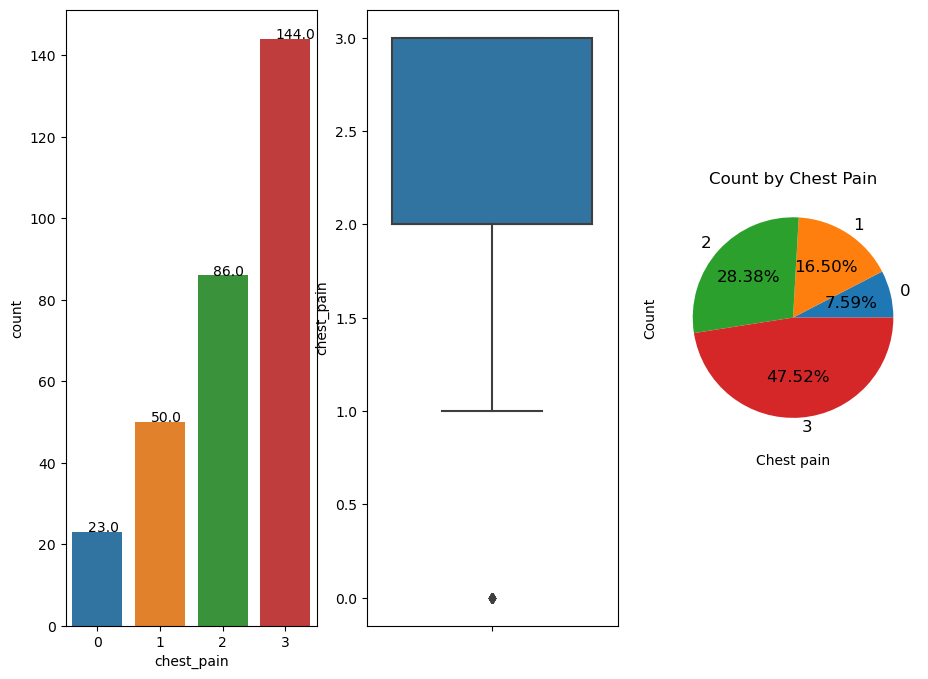

In [ ]:
visualize(heart_df,'chest_pain')

plt.title("Count by Chest Pain")
plt.xlabel("Chest pain")
plt.ylabel("Count")

**Chest pain**: Type of chest pain experienced by patient.

This term categorized into 4 category.

*   0 typical angina
*   1 atypical angina
*   2 non- anginal pain
*   3 asymptomatic


Out of 303 patients, 144 (47.52%) are asymptomatic, followed by non-anginal pain with 86 (28.38%), and others 468 (1.56%).


*   **Rest ECG**


Text(0, 0.5, 'Count')

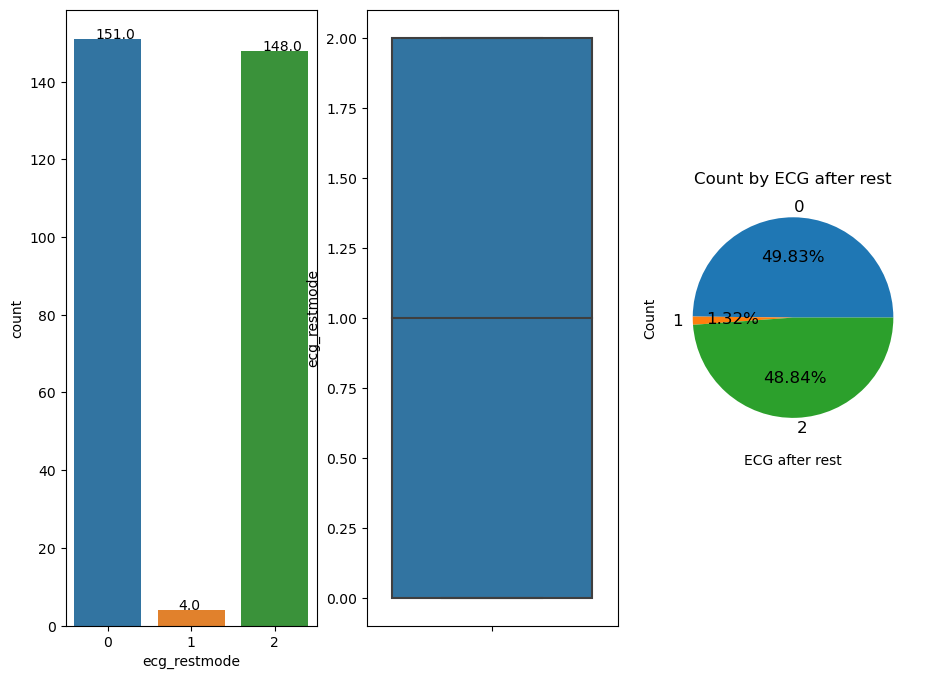

In [ ]:
visualize(heart_df,'ecg_restmode')

plt.title("Count by ECG after rest")
plt.xlabel("ECG after rest")
plt.ylabel("Count")

Of the 303 individuals, 148 (48.84%) have probable or confirmed left ventricular criteria, 151 (49.83%) have normal ECG values, and 4 (1.32%) have ST-T wave abnormalities.


*   restecg

Result of electrocardiogram while at rest are represented in 3 distinct values

      0 : Normal

      1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

      2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)


*   Age

<AxesSubplot:ylabel='age'>

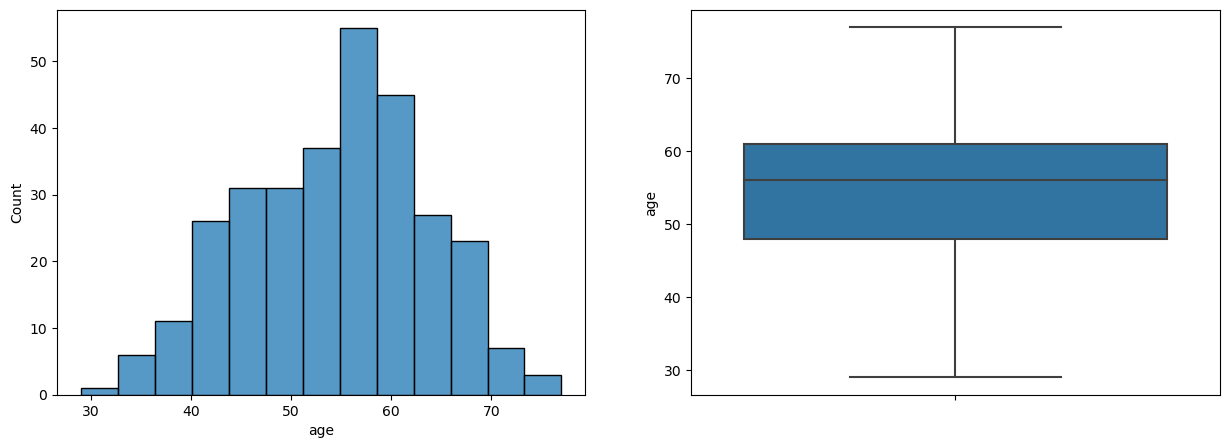

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(x='age', data=heart_df, ax=ax[0])
sns.boxplot(y='age', data=heart_df, showfliers=True, ax=ax[1])


*   More number of patients are aged between 50-65 years.
*   Elderly people over age of 70 and less than 40 years appear to be more healthy.

**Bivariate plots**

Correlation matrix

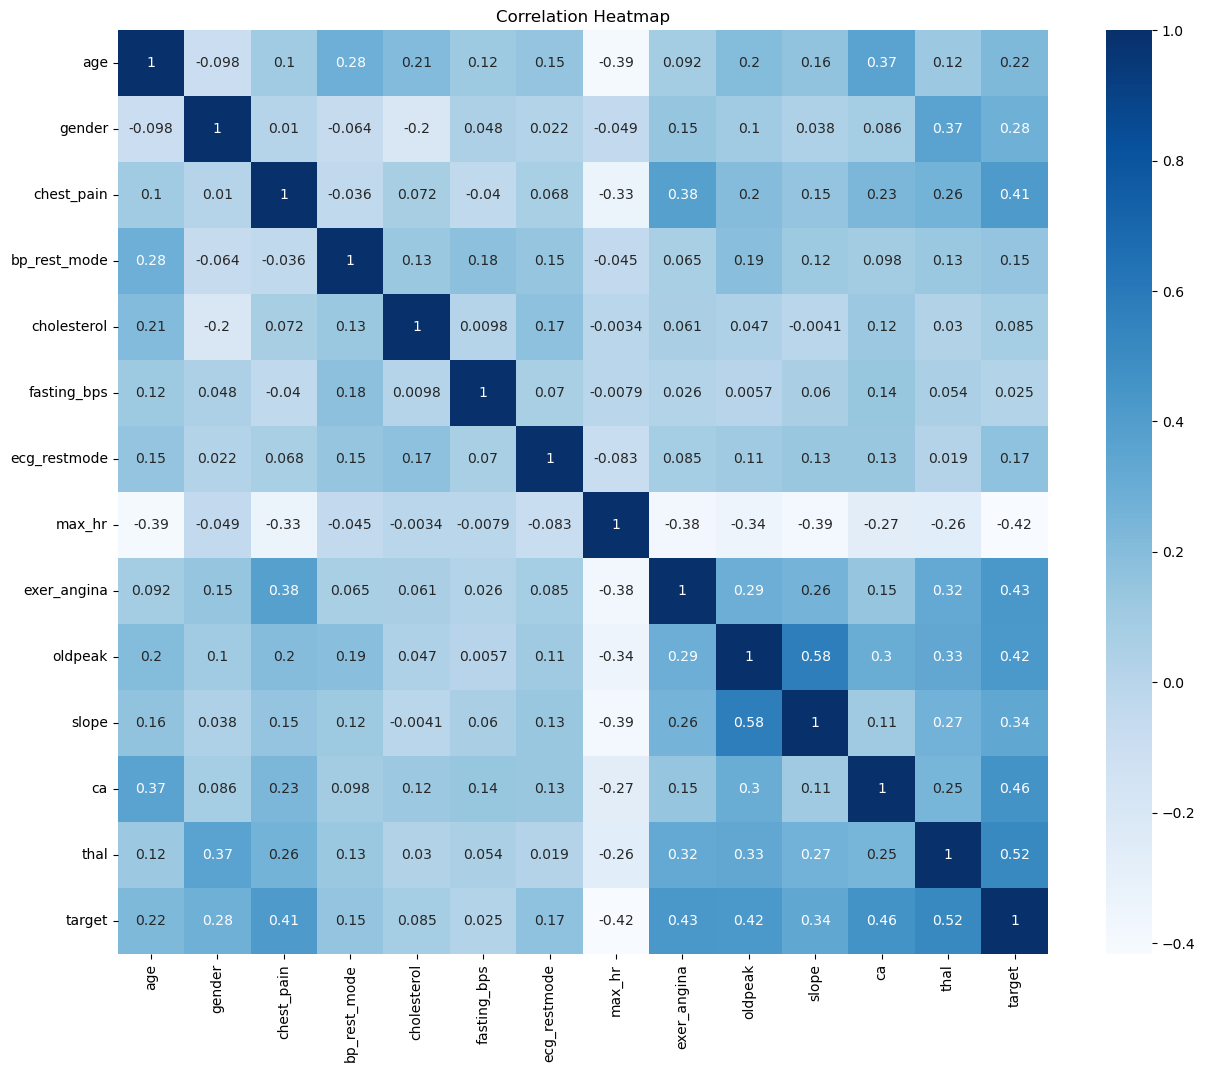

In [ ]:
# Correlation between different variables
corr = heart_df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15,12))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


*  All the variables are correlated to the target variable.
*   Not dropping any variable

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'bp_rest_mode'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting_bps'}>,
        <AxesSubplot:title={'center':'ecg_restmode'}>,
        <AxesSubplot:title={'center':'max_hr'}>],
       [<AxesSubplot:title={'center':'exer_angina'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

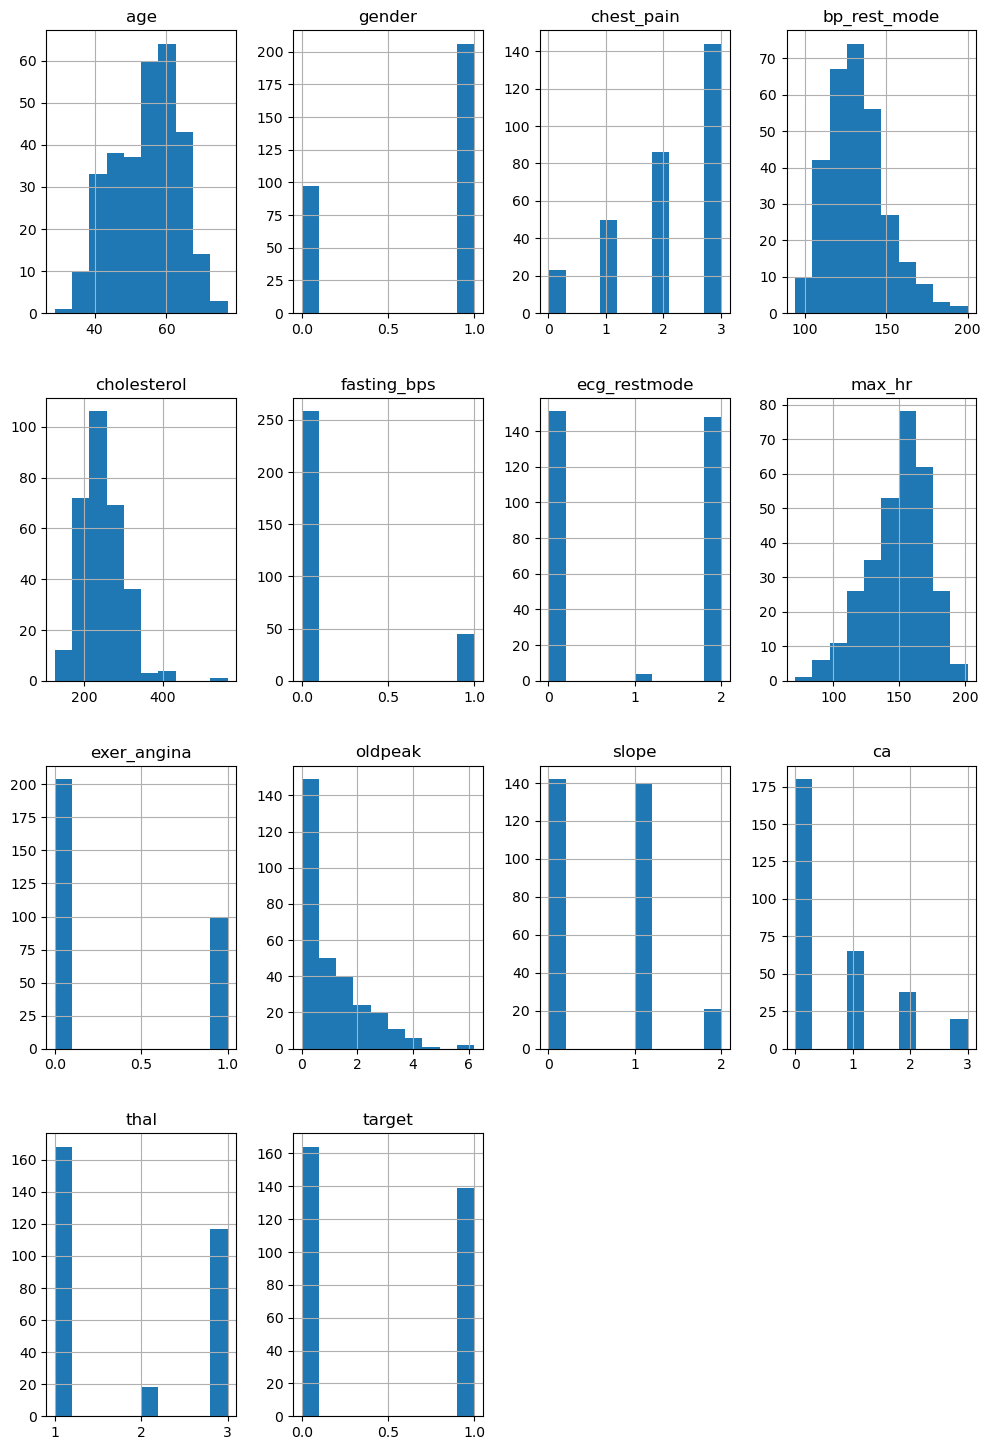

In [ ]:
fig = plt.figure(figsize = (12,18))
ax = fig.gca()
heart_df.hist(ax=ax)

**Data Preprocessing**

-------------------------------------------------------------------------------
*   Following the exploration of the dataset, we must convert some categorical variables into dummy variables and scale all of the values before training the Machine Learning models.
*   For categorical variables, we will first generate dummy columns using the get_dummies method.



In [ ]:
#one hot encoding
heart_df = pd.get_dummies(heart_df,columns=['gender', 'chest_pain','fasting_bps','ecg_restmode', 'exer_angina','slope', 'ca', 'thal'])

heart_df.head()

,age,bp_rest_mode,cholesterol,max_hr,oldpeak,target,gender_0,gender_1,chest_pain_0,chest_pain_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0



*   Partitioning a dataset into separate training and test set


In [ ]:
#create feature variable
X  = heart_df.drop(['target'],axis=1)
X

,age,bp_rest_mode,cholesterol,max_hr,oldpeak,gender_0,gender_1,chest_pain_0,chest_pain_1,chest_pain_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160,286,108,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67,120,229,129,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37,130,250,187,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41,130,204,172,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57,130,131,115,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,236,174,0.0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# created target variable
y = heart_df['target']
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Save all feature names as list
feature_cols = X.columns.tolist()


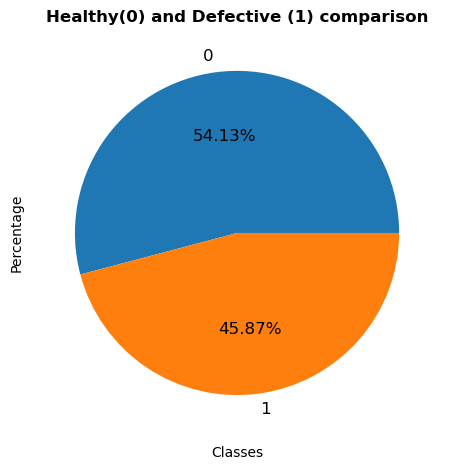

In [ ]:
# Check target classes balance

# Plot the classes
heart_df.groupby('target').size().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Healthy(0) and Defective (1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


*   Class imbalance is a common issue in machine learning, particularly in classification problems.
*   This dataset is also slightly imbalanced, with 54.13% non-default and 45.87% default.



*   Splitting dataset into training and test sets

In [ ]:
# splitting train and test 80% and 20% with random state 123.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,stratify=y
    )


*   Standardizing/ Rescaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define function to rescale training data using StandardScaler
def scale_data(X_train, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)


*   In order to ensure that the class imbalance in our population is fairly replicated in our train and test set.


In [ ]:
print("Proportion of healthy hearts in train set " + str(round(y_train.sum()/len(y_train) * 100,2 )) + "%")
print("Proportion of healthy hearts in test set " + str(round(y_test.sum()/len(y_test) * 100,2 )) + "%")

Proportion of healthy hearts in train set 45.87%
Proportion of healthy hearts in test set 45.9%


**Preparing a dataframe for model analysis**
*   SMOTE for Imbalanced data

In [ ]:
!pip install -U imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install xgboost
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 70.9/70.9 MB 16.8 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report
import warnings
warnings.simplefilter("ignore")

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier',xgb.XGBClassifier(objective="binary:logistic", random_state=42)))
models.append(('RandomForestClassifier', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_validate(model, X_train_scaled_smote, y_train_smote, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 print('%s: %f %f %f' % (name, np.mean(cv_results['test_accuracy']),np.mean(cv_results['test_precision']),np.mean(cv_results['test_recall'])))

LogisticRegression: 0.816524 0.829593 0.808242
DecisionTreeClassifier: 0.721510 0.730205 0.709341
XGBClassifier: 0.809259 0.825005 0.801099
RandomForestClassifier: 0.809259 0.822351 0.801648


**Predictive modeling**

*   **Model Optimization**

    **Grid Search on Logistic Regression Model**

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression(solver='liblinear',random_state=15)

In [ ]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search_log = grid_search_log.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8472423802612482


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.868852,0.8125,0.928571,0.866667,0.873377


Before hyperparameter tuning the LogisticRegression: accuracy:0.801852,  precision: 0.818741, recall:0.786264.



*   As the dataset is slightly imbalanced, we will consider Precision, Recall and F1 score instead of Accuracy.
*   After tuning, we can see that the Precision, Recall, and F1 score have improved in maintaining balance.  



In [ ]:
#print confusion matrix
cm

array([[27,  6],
       [ 2, 26]], dtype=int64)

  **Grid Search on Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8203918722786648


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.868852,0.812500,0.928571,0.866667,0.873377
1,Decision Tree Tuned,0.819672,0.793103,0.821429,0.807018,0.819805


In [ ]:
cm

array([[27,  6],
       [ 2, 26]], dtype=int64)

**Grid Search on XG Boost**

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

estimator = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [10],
    'learning_rate': [0.02]}

In [ ]:
grid_search_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 1,
    cv = 5
)

In [ ]:
grid_search_xgboost = grid_search_xg.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_xg = grid_search_xgboost.best_score_

In [ ]:
print('Accuracy on xg boost :',best_accuracy_xg)

Accuracy on xg boost : 0.8015239477503628


In [ ]:
best_parameters = grid_search_xgboost.best_params_
best_parameters

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 10}

In [ ]:
y_pred_xg= grid_search_xgboost.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xg)
acc = accuracy_score(y_test, y_pred_xg)
prec = precision_score(y_test, y_pred_xg)
rec = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)
model =  pd.DataFrame([['XG Boost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.868852,0.812500,0.928571,0.866667,0.873377
1,Decision Tree Tuned,0.819672,0.793103,0.821429,0.807018,0.819805
2,XG Boost Tuned,0.836066,0.821429,0.821429,0.821429,0.834957


**Grid Search on Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8317851959361393


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 1000}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.868852,0.812500,0.928571,0.866667,0.873377
1,Decision Tree Tuned,0.819672,0.793103,0.821429,0.807018,0.819805
2,XG Boost Tuned,0.836066,0.821429,0.821429,0.821429,0.834957
3,Random Forest Tuned,0.885246,0.838710,0.928571,0.881356,0.888528


**--------------------------------------------------------------------------------**

**Model Comparison**

Confusion Matrix

In [ ]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import scikitplot as skplt

<AxesSubplot:title={'center':'XG Boost'}, xlabel='Predicted label', ylabel='True label'>

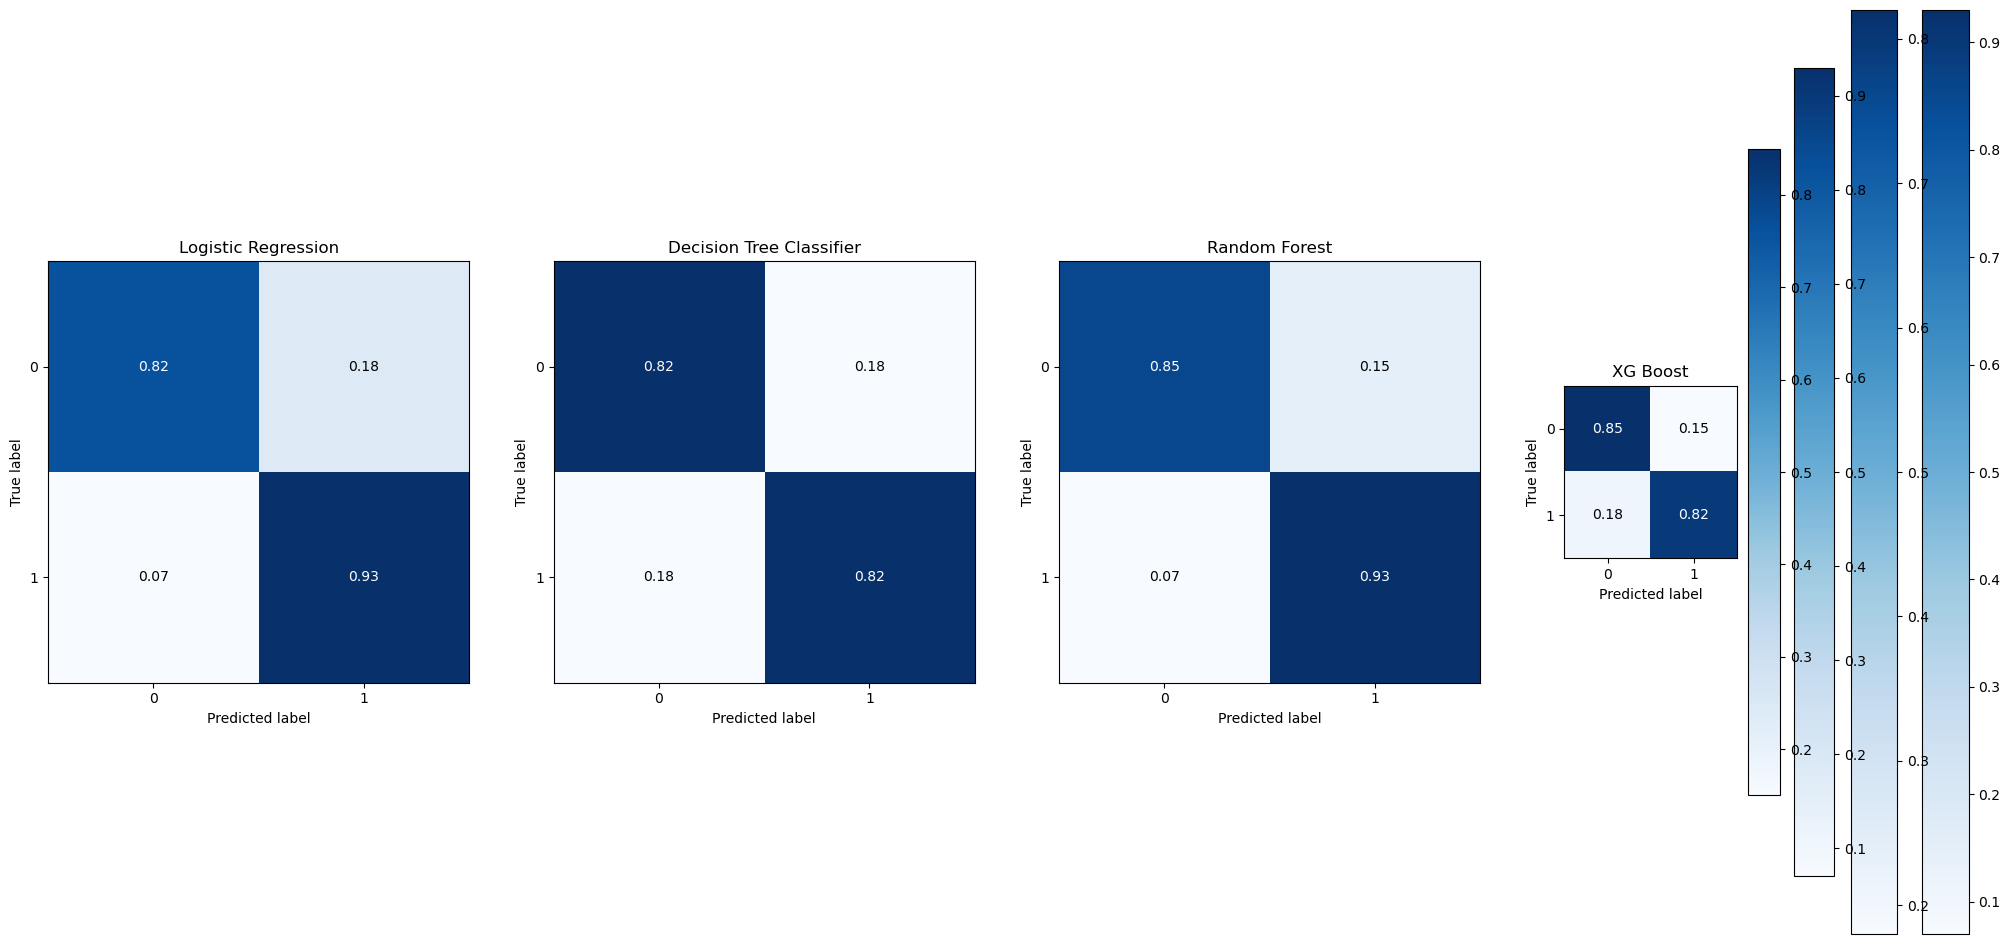

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(25,12))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log, normalize=True,title="Logistic Regression",ax=ax[0])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dct,normalize=True,title="Decision Tree Classifier",ax=ax[1])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf,normalize=True,title="Random Forest",ax=ax[2])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg,normalize=True,title="XG Boost",ax=ax[3])


*   True positives and True negatives outperform False negatives and False positives.


**ROC_AUC Curve**

In [ ]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]


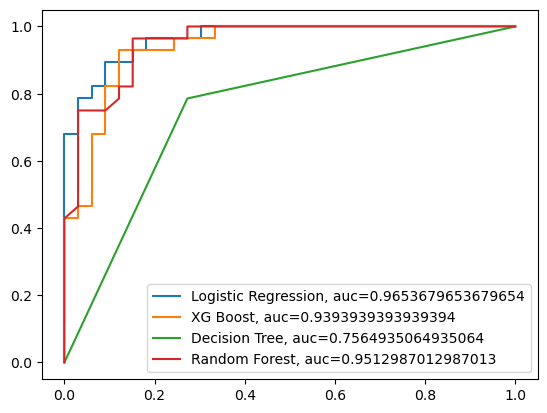

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, probs_lr)
auc = metrics.roc_auc_score(y_test, probs_lr)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, probs_xg)
auc = metrics.roc_auc_score(y_test, probs_xg)
plt.plot(fpr,tpr,label="XG Boost, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, probs_dt)
auc = metrics.roc_auc_score(y_test, probs_dt)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, probs_rf)
auc = metrics.roc_auc_score(y_test, probs_rf)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))

plt.legend(loc=0)


*   The ROC curve appears to have sharp edges due to the small amount of datapoints.

**Precision_Recall Curve**

Since the classes are imbalanced, precision_recall curve is more approriate.

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

baseline_model = sum(y_test == 1) / len(y_test)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

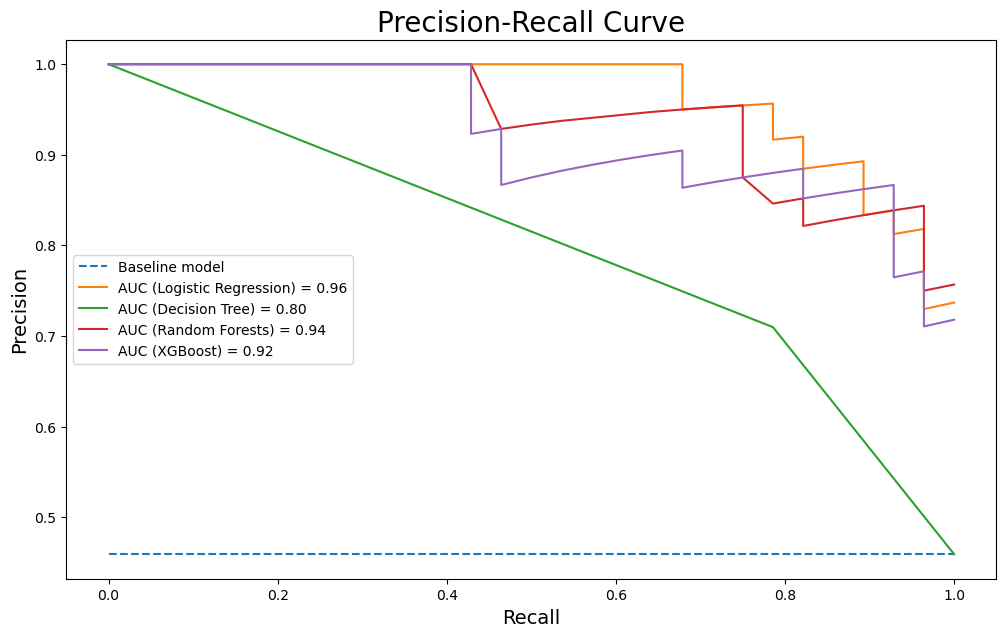

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')

plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

**Feature importance**

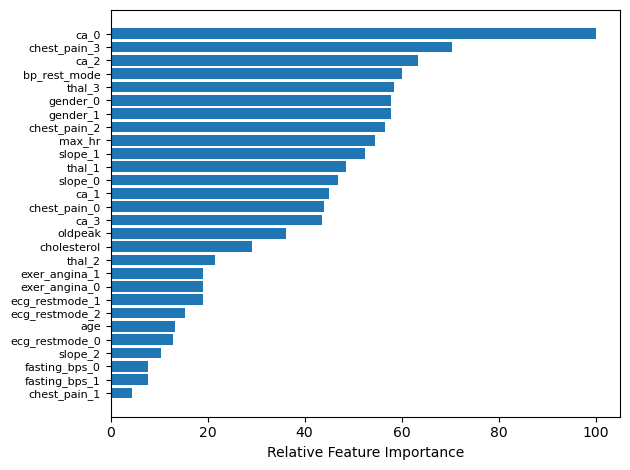

In [ ]:
# Plot feature importance
clf = LogisticRegression(random_state = 42)
clf.fit(X_train_scaled, y_train)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()


*   "ca_0" and "chest_pain_3" are the most important and they are the strongest predictors of the heart disease of a patient.


